**Name:** Mehakk Lunkar<br>
**Registration No.:** 2448531<br>
**Lab-4:** Linear Predictive Coding (LPC) Model for Speech Recognitions<br>

### a) Use a recorded short speech signal/download the same from any speech dataset.

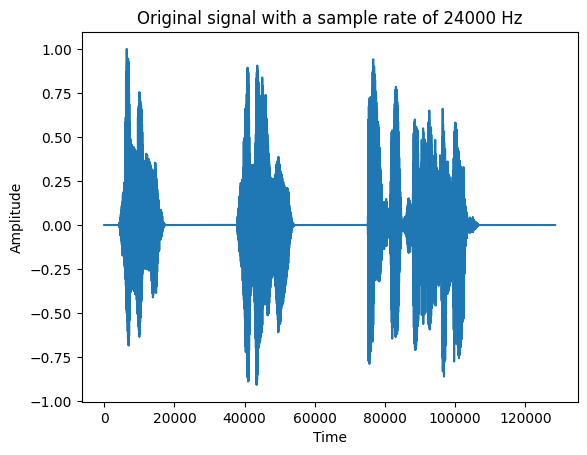

In [10]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

sample_rate, speech = wavfile.read(r"/content/spr_lab4_input.wav")
speech = speech / np.max(speech)
plt.plot(speech)
plt.title(f"Original signal with a sample rate of {sample_rate} Hz")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

The speech in the above signal is **Hello!How are you? I hope this is enough.**

### b) Implement the LPC algorithm to analyze the recorded speech signal and extract LPC coefficients.

We will follow the following approach,
- Calculate the autocorrelation
- Use the autocorrelation to create the Toeplitz matrix
- Solve the matrix for the LPC coefficients

In [11]:
import numpy as np
from scipy.linalg import toeplitz

def lpc(signal, order):
    # Autocorrelation
    autocorr = np.correlate(signal, signal,
                            mode='full')
    autocorr = autocorr[len(autocorr)//2:]

    # Creating the Toeplitz matrix
    R = toeplitz(autocorr[:order])
    r = autocorr[1:order + 1]

    # Solving for LPC coefs
    lpc_coef = np.linalg.solve(R, r)

    return np.concatenate([[1], -lpc_coef])

lpc_coef = lpc(speech, 24)
lpc_coef

array([ 1.        , -0.75561952, -0.63504665, -0.124289  ,  0.92890261,
       -0.44795608,  0.0930583 , -0.1823489 ,  0.48659924, -0.3797102 ,
        0.23553565, -0.30945603,  0.4099324 , -0.45377701,  0.26512973,
       -0.26444467,  0.35201565, -0.24635133,  0.32327491, -0.29867131,
        0.15277104, -0.16579265,  0.09557911, -0.16526993,  0.18404213])

These coefficients capture the predictive relationship between the samples in the speech signal.

### c) Reconstruct the speech signal from the LPC coefficients and plot the original and reconstructed signals.

We will use inverse filtering to reconstruct the signal.

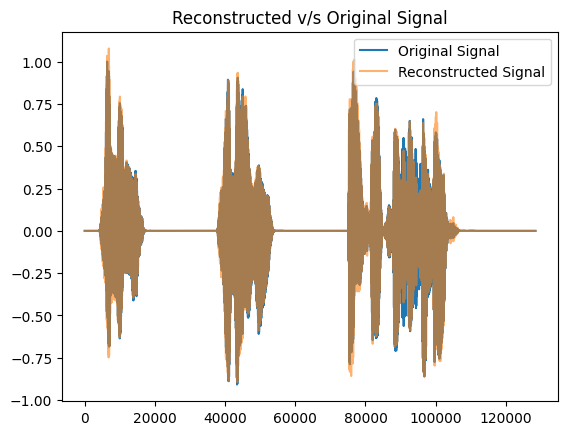

In [12]:
from scipy.signal import lfilter

reconstructed = lfilter([0] + -lpc_coef[1:], [1], speech)

plt.plot(speech, label='Original Signal')
plt.plot(reconstructed, alpha=0.6, label='Reconstructed Signal')
plt.title("Reconstructed v/s Original Signal")
plt.legend()
plt.show()

### d) Estimate the formants from the LPC coefficients and compare them to the expected values for vowels (e.g., for vowels like /a/, /e/, /i/, etc.).

### e) Plot the formant frequencies and visualize them on a frequency response plot.

In [13]:
# Finding the roots of the LPC polynomial
roots = np.roots(lpc_coef)

# Filtering out the roots outside the unit circle
roots = [r for r in roots if np.abs(r) < 1]

# Calculating the angles of the roots
angles = np.angle(roots)

# Converting angles to frequncies
formants = sorted(angles * (sample_rate / (2 * np.pi)))

# Keeping only speech formants
formants = [f for f in formants if f > 100 and f < 4800]
formants

[np.float64(362.42900718818055),
 np.float64(1033.8257048156404),
 np.float64(1907.9162124916038),
 np.float64(3205.280014675829),
 np.float64(4284.616657618941)]

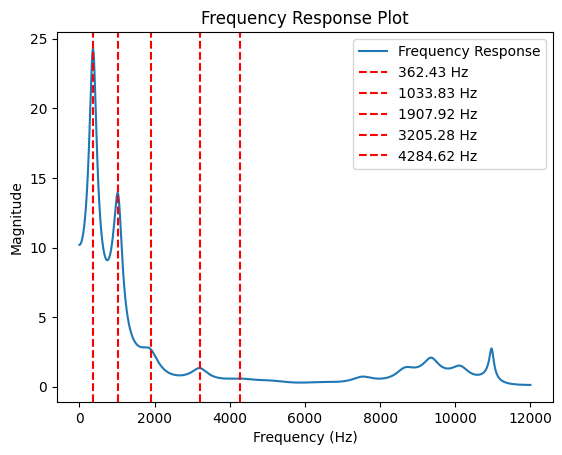

Formants: [np.float64(362.42900718818055), np.float64(1033.8257048156404), np.float64(1907.9162124916038), np.float64(3205.280014675829), np.float64(4284.616657618941)]


In [14]:
from scipy.signal import freqz

w, h = freqz(1, lpc_coef, worN=8000)
freqs = w * sample_rate / (2 * np.pi)

plt.plot(freqs, np.abs(h), label='Frequency Response')
plt.title("Frequency Response Plot")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

for formant in formants:
    plt.axvline(formant, color='red', linestyle='--', label=f'{formant:.2f} Hz')
plt.legend(loc='best')
plt.show()
print(f"Formants: {formants}")

Let us look at what the format frequencies represent in terms of vowels,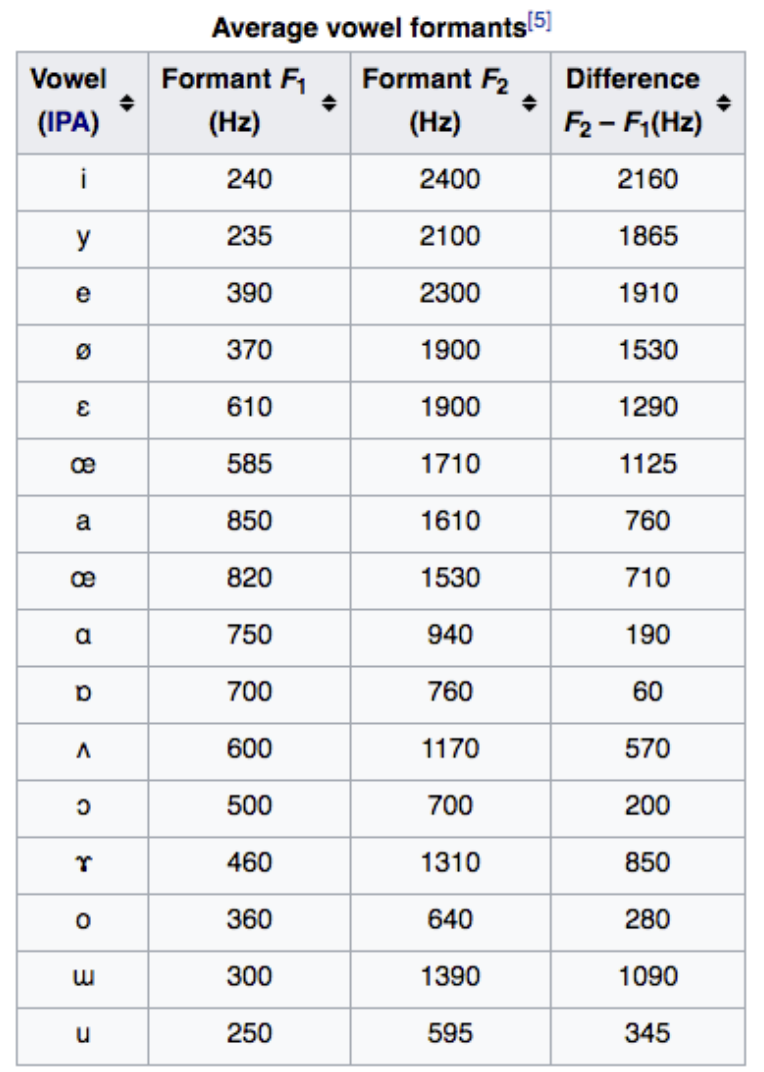

Therefore, we have,
```
231 Hz - /y/, /i/, /u/
957 Hz - /a/
1963 Hz - either /e/ or /o/
```

The initial sentence was **Hello!How are you? I hope this is enough.**, so the vowels, /a/, /e/, /i/, /o/, and /u/ are present.